<a href="https://colab.research.google.com/github/FuturisticLover123/labs/blob/main/ekz/ekz_tasks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#var 3
!pip install numdifftools


In [ ]:

import numpy as np
import numdifftools as nd

In [ ]:
n = 10
A = np.random.random(size = (10, 10))
x = np.random.random(size = (10, 1))
xtat = lambda x : x.T @ A @ x

In [ ]:
print(nd.Gradient(xtat)(x))
print(((A + A.T) @ x).reshape(-1))
# нифига совпали

[7.87808752 6.80197954 6.50011556 5.45983271 7.11624441 5.73094782
 5.29721864 5.61724009 7.62212931 6.65521135]
[7.87808752 6.80197954 6.50011556 5.45983271 7.11624441 5.73094782
 5.29721864 5.61724009 7.62212931 6.65521135]


In [ ]:
#var 5

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d vipullrathod/fish-market -p /content/sample_data/var5
!unzip /content/sample_data/var5/fish-market.zip -d /content/sample_data/var5

Dataset URL: https://www.kaggle.com/datasets/vipullrathod/fish-market
License(s): CC0-1.0
  0% 0.00/2.38k [00:00<?, ?B/s]
100% 2.38k/2.38k [00:00<00:00, 4.01MB/s]
Archive:  /content/sample_data/var5/fish-market.zip
  inflating: /content/sample_data/var5/Fish.csv  


In [ ]:
import pandas as pd
data = pd.read_csv('/content/sample_data/var5/Fish.csv')

In [ ]:
set(data['Species'])

{'Bream', 'Parkki', 'Perch', 'Pike', 'Roach', 'Smelt', 'Whitefish'}

In [ ]:
x = pd.get_dummies(data, columns = ['Species']).astype(float).drop(columns = ['Weight']).values
y = data['Weight'].values

In [ ]:
#a
from sklearn.linear_model import LinearRegression

In [ ]:
lr = LinearRegression().fit(x, y)

In [ ]:
#б

In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y)
print(mean_absolute_error(y_test, lr.predict(x_test)))
print(mean_squared_error(y_test, lr.predict(x_test)))
print(lr.score(x_test, y_test))

55.9658642488547
5318.196999528952
0.9263961460289363


In [ ]:
# в

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
new_f = PolynomialFeatures(degree=2).fit_transform(x)

In [ ]:
lr = LinearRegression().fit(new_f, y)
x_train, x_test, y_train, y_test = train_test_split(new_f, y)
print(mean_absolute_error(y_test, lr.predict(x_test)))
print(mean_squared_error(y_test, lr.predict(x_test)))
print(lr.score(x_test, y_test))

21.921880763859697
1243.263892423946
0.9906574052137933


In [ ]:
#кайфы

In [ ]:
# var 9-10

In [30]:
!kaggle datasets download -d lakshmi25npathi/imdb-dataset-of-50k-movie-reviews -p /content/sample_data;
!unzip /content/sample_data/imdb-dataset-of-50k-movie-reviews.zip -d /content/sample_data;


Dataset URL: https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews
License(s): other
 62% 16.0M/25.7M [00:00<00:00, 165MB/s]
100% 25.7M/25.7M [00:00<00:00, 206MB/s]
Archive:  /content/sample_data/imdb-dataset-of-50k-movie-reviews.zip
  inflating: /content/sample_data/IMDB Dataset.csv  


In [27]:
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
import nltk

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt_tab')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [28]:
def preprocess_text(text):
    text = text.lower()

    text = re.sub(r'[^\w\s]', '', text)

    words = word_tokenize(text)

    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]

    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]

    stemmer = PorterStemmer()
    words = [stemmer.stem(word) for word in words]

    return ' '.join(words)


text = "I running love programming in Python, and I enjoy solving coding challenges!"

processed_text = preprocess_text(text)
print(processed_text)


run love program python enjoy solv code challeng


In [31]:
data = pd.read_csv('/content/sample_data/IMDB Dataset.csv')

In [32]:
data["review"] = data["review"].apply(preprocess_text)

In [33]:
y = np.array([x == "positive" for x in data['sentiment']]).astype(int)

In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(data["review"].values)

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [40]:
inner_model = LogisticRegression(penalty=None)
inner_model.fit(X_train, y_train)

LogisticRegression(penalty=None)

In [41]:
print(accuracy_score(y_train, inner_model.predict(X_train)))
print(accuracy_score(y_test, inner_model.predict(X_test)))

0.9973714285714286
0.8785333333333334


In [42]:
print(f1_score(y_train, inner_model.predict(X_train)))
print(f1_score(y_test, inner_model.predict(X_test)))

0.9973575367647058
0.8802576235541535


In [ ]:

# var 11

In [43]:
from sklearn.datasets import make_classification

In [46]:
x, y = make_classification(n_samples = 100, n_features = 2, n_redundant=0)

In [48]:
from sklearn.metrics import accuracy_score
import numpy as np
from sklearn.model_selection import cross_val_score

class NBC:
  def pxy(self, distibution, x, cld):
    if distibution == "gaussian":
      m, q = cld
      return (1 / (q * np.sqrt(2 * np.pi)) ) * np.exp(-((x - m)**2 / (2 * q**2)))

  def get_cl_data(self, distibution, x):
    if distibution == "gaussian":
      return np.mean(x), np.std(x)

  def fit(self, x, y, feature_distribution: dict = {}):
    self.x, self.y = x, y
    self.classes = list(set(y))
    self.feature_distribution = feature_distribution
    indexes = { clas : np.where(y == clas)[0] for clas in self.classes }

    self.prior_probability = { clas : len(indexes[clas]) / len(y) for clas in indexes }

    self.classifying_data = dict()
    for clas in self.classes:
      self.classifying_data[clas] = self.classifying_data.get(clas, dict())
      for feature in range(x.shape[1]):
        distribution = self.feature_distribution.get(feature, "gaussian")
        self.classifying_data[clas][feature] = self.get_cl_data(distribution, x[indexes[clas]][: ,feature])
    return self

  def classify(self, x):
    weights = { clas : np.log(self.prior_probability[clas]) for clas in self.classes }
    for clas in self.classes:
      for feature in range(len(x)):
        distribution = self.feature_distribution.get(feature, "gaussian")
        weights[clas] += np.log( self.pxy(distribution, x[feature], self.classifying_data[clas][feature]) )
    return max(weights, key=weights.get)

  def predict(self, x):
    return np.array([self.classify(x_i) for x_i in x])

  def score(self, x, y):
    y_pred = self.predict(x)
    return accuracy_score(y, y_pred)

In [51]:
model = NBC().fit(x, y)

In [52]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

def picture(model, x, y):
  x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
  y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                      np.arange(y_min, y_max, 0.1))

  Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)

  plt.figure(figsize=(8, 6))
  plt.contourf(xx, yy, Z, alpha=0.75, cmap='coolwarm')  # Зона классификации
  plt.scatter(x[:,0],x[:,1],c = y, cmap='coolwarm');
  plt.title("Граница принятия решения логистической регрессии")
  plt.xlabel('Признак 1')
  plt.ylabel('Признак 2')
  plt.colorbar(label='Класс')
  plt.show()


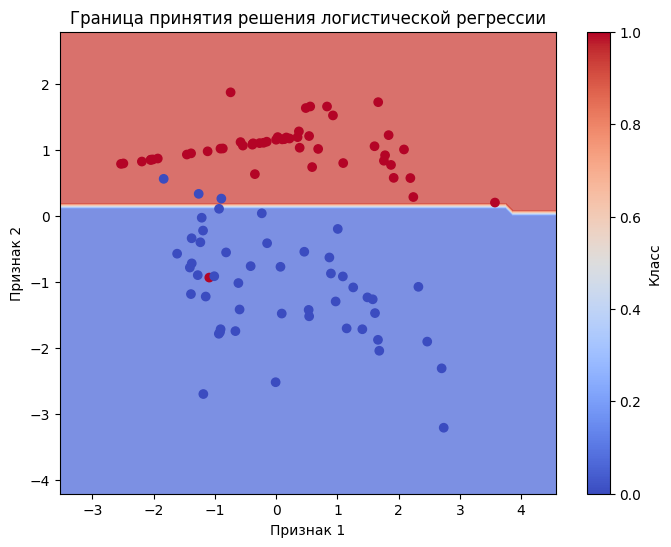

In [53]:
picture(model, x, y)

In [57]:
print(accuracy_score(y, model.predict(x)))
print(f1_score(y, model.predict(x)))

0.96
0.9615384615384616


In [60]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x, y)
print(accuracy_score(y, gnb.predict(x)))
print(f1_score(y, gnb.predict(x)))

0.96
0.9615384615384616


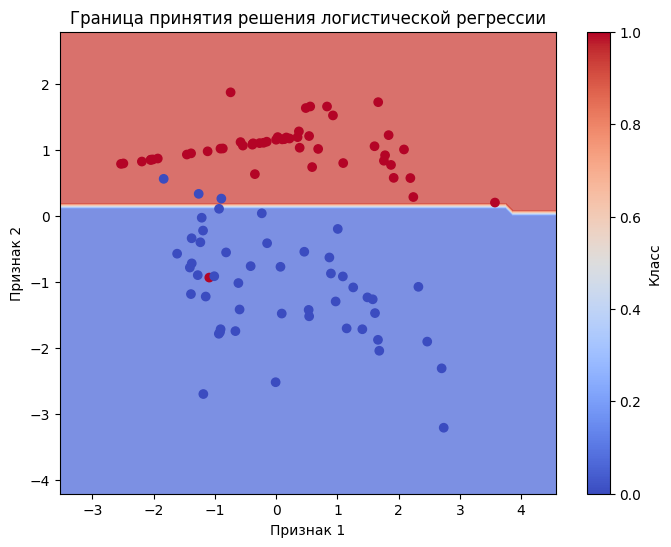

In [61]:
picture(gnb, x, y)

In [ ]:
#var 12-13

In [62]:
from sklearn.datasets import load_iris

In [63]:
x, y = load_iris(return_X_y=True)

In [68]:
class myPCA:
  def fit(self, x):
    centered = x - np.mean(x)
    eigenvalues, eigenvectors = np.linalg.eig(np.cov(centered.T))
    sorted_indices = np.argsort(eigenvalues)[::-1]

    self.c = eigenvalues[sorted_indices]
    self.vectors = eigenvectors[:, sorted_indices].T
    self.cs = np.cumsum(self.c / np.sum(self.c))
    return self

  def transform(self, x, components: int =None, p = 0.95):
    if components is not None:
      return (x - np.mean(x, axis=0)) @ self.vectors[:components].T
    return (x - np.mean(x, axis=0)) @ self.vectors[:np.argmax(self.cs > p)].T

  def fit_transform(self,x,  components:int=None, p=0.95):
    self.fit(x)
    return self.transform(x, components=components, p=p)

In [82]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(x)

model = myPCA().fit(x)

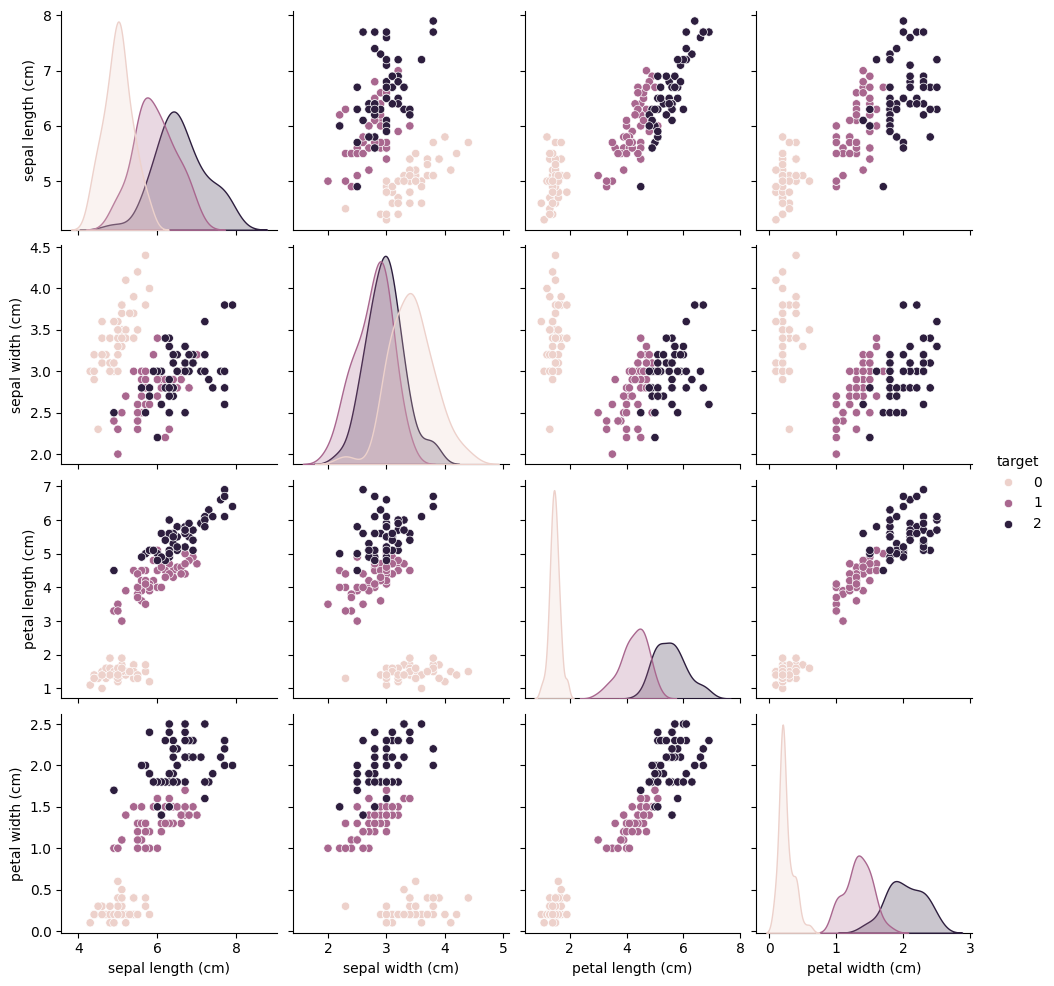

In [73]:

import seaborn as sns
from sklearn.datasets import load_iris

iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['target'] = iris.target

sns.pairplot(iris_df, hue='target')
plt.show()

In [83]:
model.transform(x, components=2);
pca.transform(x);
# освпали

In [84]:
# var 14

In [90]:
import cv2
from sklearn.decomposition import PCA

In [88]:
gray_image = cv2.imread('tree.jpg', cv2.IMREAD_GRAYSCALE)

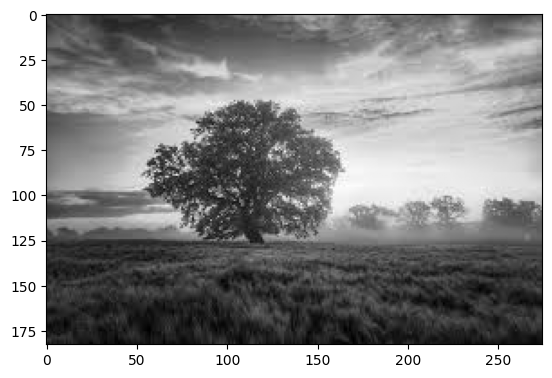

In [89]:
plt.imshow(gray_image, cmap='gray')
plt.show()

In [121]:
components = 100
model = PCA(n_components=components).fit(gray_image)

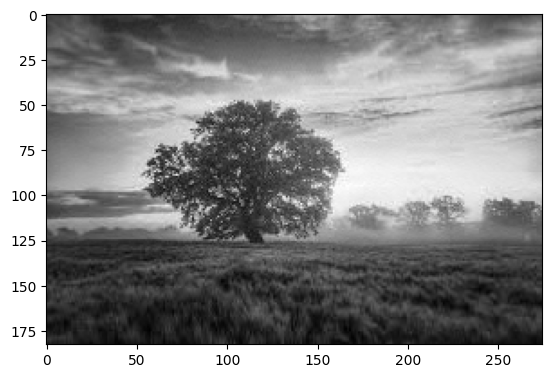

In [122]:
plt.imshow(model.inverse_transform(model.transform(gray_image)).astype(int), cmap='gray')
plt.show()

In [ ]:
#var 15

In [177]:
from sklearn.datasets import make_blobs

In [197]:
x, y = make_blobs(n_samples=100, n_features=2, centers=3,  cluster_std = 0.5)

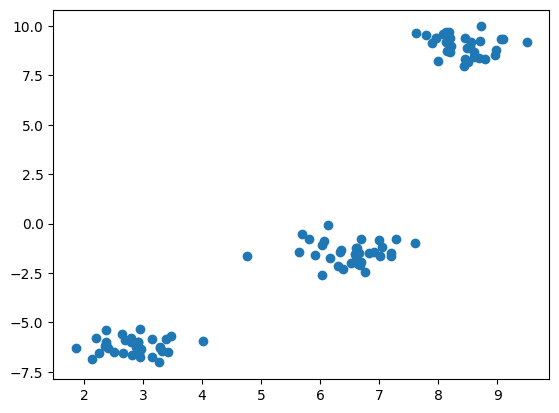

In [198]:
plt.scatter(x[:, 0], x[:, 1])
plt.show()

In [188]:
class KMeans:
  def __init__(self, k=3, max_iter=100):
    self.labels_, self.k= list(range(k)), k
    self.max_iter=max_iter

  def _init_one_center(self, x):
    return np.array([np.random.uniform(np.min(x[:, i]) , np.max(x[: , i])) for i in range(x.shape[1])])

  def _init_centers(self, x):
    self.cluster_centers_ =  np.array([self._init_one_center(x) for _ in self.labels_])

  def fit(self, x):
    self._init_centers(x)
    for n in range(self.max_iter):
      new_clusters = self.kmeans_step(x)
      if np.array_equal(new_clusters, self.cluster_centers_):
        return self
      self.cluster_centers_ = new_clusters
    return self


  def kmeans_step(self, x):
    clusters = [list() for _ in self.labels_]
    for point in x:
      distances = [np.linalg.norm(point - center) for center in self.cluster_centers_]
      clusters[np.argmin(distances)].append(point)

    new_centers = np.array([np.mean(cluster,axis=0) if len(cluster) > 0 else self._init_one_center(x) for cluster in clusters])
    return new_centers

  def classify(self, x):
    return np.argmin([np.linalg.norm(x - center) for center in self.cluster_centers_])

  def predict(self, x):
    return np.array([self.classify(x_i) for x_i in x])


In [189]:
def picture(y_out, centers, labels, ax):
  colors = plt.cm.viridis(np.linspace(0, 1, len(labels)))
  ax.clear()

  for color, m in zip(colors, labels):
    points = x[np.where(y_out == m)[0], :]
    ax.scatter(points[:, 0], points[:, 1], c=color)
    ax.scatter(*centers[m] , c='red', s=100)

    circle = plt.Circle(centers[m], max([np.linalg.norm(point - centers[m]) for point in points]), color=color, fill=False)
    ax.add_artist(circle)


In [190]:
class KMeansAnimation(KMeans):
  def __init__(self, k=3, max_iter=100):
    self.labels_, self.k= list(range(k)), k
    self.max_iter=max_iter
    self.fitting_data = list()
    self.fitting_outs = list()


  def fit(self, x):
    self._init_centers(x)

    self.fitting_data.append(self.cluster_centers_.copy())
    self.fitting_outs.append(self.predict(x).copy())

    for n in range(self.max_iter):
      new_clusters = self.kmeans_step(x)
      if np.array_equal(new_clusters, self.cluster_centers_):
        self.fitting_data.append(self.cluster_centers_.copy())
        self.fitting_outs.append(self.predict(x).copy())
        return self

      self.cluster_centers_ = new_clusters

      self.fitting_data.append(self.cluster_centers_.copy())
      self.fitting_outs.append(self.predict(x).copy())
    return self


In [199]:
kmani = KMeansAnimation(k=3).fit(x)
fit_centers, fit_clusters = kmani.fitting_data, kmani.fitting_outs

<ipython-input-189-da56e0d3eabb>:7: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(points[:, 0], points[:, 1], c=color)


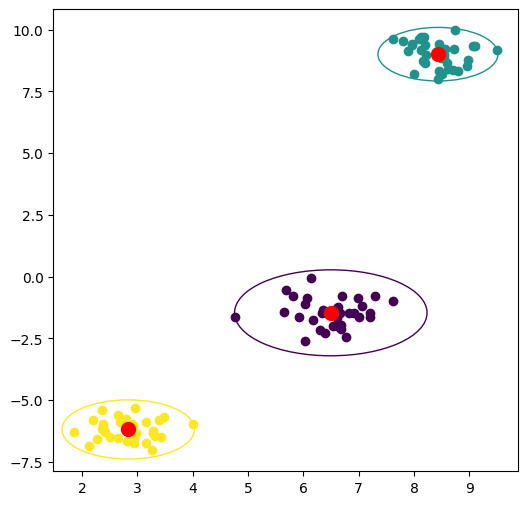

In [200]:
fig, ax = plt.subplots(figsize=(6, 6))
picture(fit_clusters[-1], fit_centers[-1], kmani.labels_, ax);

In [201]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML


def update(frame):
    picture(fit_clusters[frame], fit_centers[frame], kmani.labels_, ax);

ani = FuncAnimation(fig, update, frames=len(fit_centers)-1, interval=1000, repeat=False);

display(HTML(ani.to_jshtml()))

<ipython-input-189-da56e0d3eabb>:7: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(points[:, 0], points[:, 1], c=color)
